*Part 2: Python for Data Analysis IV*
### Combining, analyzing and visualizing data
#Exercises#



---


<font color='violet'>
Hints are written in white, so you do not see them immediately. If you highlight them (or double-click on them), they will appear!
<font color='white'> I am a hint! :-)


---


For this exercise, we will use the following datasets:
* ``homicide.csv`` (homicide and other data for all countries)
* ``real-gdp-per-capita-clean.csv`` (country level gdp data from 1950-2017)

You can find them here: https://drive.google.com/drive/folders/1QnHTDQ0tb8_Ex6dMgNCwqJuL3PxzEKIv

Copy them to your drive or to a folder on your computer. Import ``pandas``, ``numpy`` and ``os`` and change your directory to the folder where you placed your data. If you work with Google Drive, mount your drive!

If you do not manage to mount your drive, you can also read the data using `pd.read_csv()` from the following URLs:
* `"http://farys.org/daten/homicide.csv"`
* `"http://farys.org/daten/real-gdp-per-capita-clean.csv"`

## Exercise 1

Import the ``pyplot`` module from ``matplotlib``.

In [1]:
# Solution:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


C:\Users\Raphael\AppData\Local\Temp\ipykernel_14868\1270449846.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Read in the gdp data (``real-gdp-per-capita-clean.csv``) and use a line graph to plot the evolution of the GDP for Switzerland, Kenya and Syria. Add a legend to your plot.

In [2]:
os.chdir("../4_Data")

In [3]:
# Solution
gdp = pd.read_csv("real-gdp-per-capita.csv")

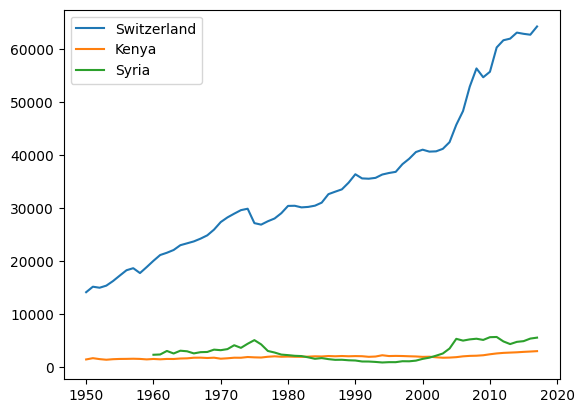

In [6]:
# Solution:
countries = ["Switzerland", "Kenya", "Syria"]

for c in countries:
    plt.plot(gdp.loc[gdp["country"] == c, "year"], gdp.loc[gdp["country"] == c, "gdp_per_capita"], label=c)

plt.legend()

## Exercise 2

Read in the homicide data and compute the homicide rate of the median county on each continent.

In [7]:
# Solution:
homicide = pd.read_csv("homicide.csv")
homicide.head()

,country,code,gni_per_capita,population,continent,top10_share,homicide
0,Aruba,ABW,26250.0,104000.0,North America,NaN,NaN
1,Afghanistan,AFG,600.0,34414000.0,Asia,NaN,1.546670
2,Angola,AGO,4520.0,27884000.0,Africa,NaN,0.483067
3,Albania,ALB,4390.0,2891000.0,Europe,22.9,0.316194
4,Andorra,AND,NaN,78000.0,Europe,NaN,0.100418


In [9]:
median_homicide_per_continent = homicide.groupby("continent")["homicide"].agg(["median"])
median_homicide_per_continent

,median
continent,
Africa,0.721243
Asia,0.424796
Europe,0.132571
North America,2.356149
Oceania,0.565338
South America,1.207245


Make a bar plot that visualizes these figures. You should have the name of the continents on your x-axis and the median homicide rate on the y-axis.

<BarContainer object of 6 artists>

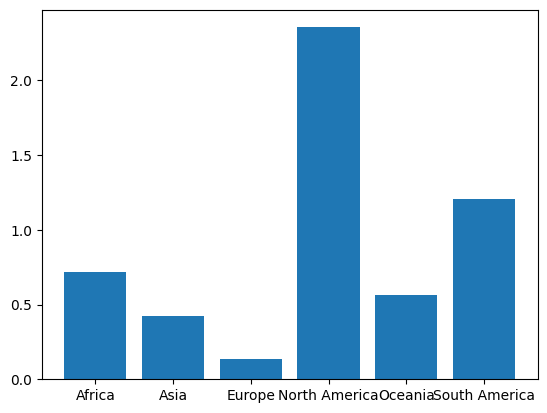

In [11]:
# Solution:
plt.bar(median_homicide_per_continent.index, median_homicide_per_continent["median"])

Try to improve your plot doing the following:
* Make a horizontal instead of a vertical bar plot
* Add "Share of homicides in median country" as an axis label
* Change the color of the bars to a dark red
* Put black border lines around the bars (``edgecolor``)
* Add a vertical grid
* Move bars in front of the grid (``zorder``)
* Add the title "Homicide rates by continent"

Text(0.5, 1.0, 'Homicide rates by continent')

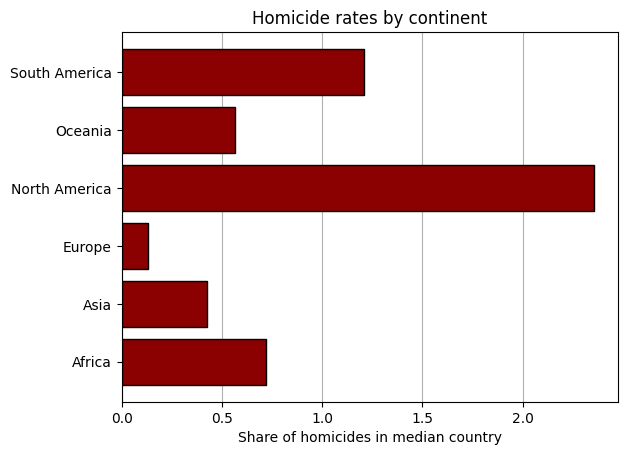

In [15]:
# Solution:
plt.barh(median_homicide_per_continent.index, median_homicide_per_continent["median"],
         color="darkred",
         edgecolor="black",
         zorder=2)
plt.xlabel("Share of homicides in median country")
plt.grid(axis="x")
plt.title("Homicide rates by continent")



Can you do the same using the object-oriented interface?

C:\Users\Raphael\AppData\Local\Temp\ipykernel_14868\3366428890.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


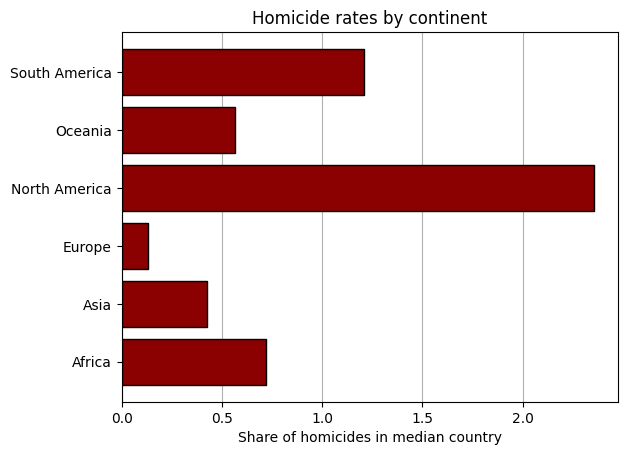

In [17]:
# Solution:
fig, ax = plt.subplots()

ax.barh(median_homicide_per_continent.index, median_homicide_per_continent["median"],
         color="darkred",
         edgecolor="black",
         zorder=2)
ax.set_xlabel("Share of homicides in median country")
ax.grid(axis="x")
ax.set_title("Homicide rates by continent")
fig.show()

## Exercise 3

We will continue to work with the homicide data. You hypothesize that more unequal countries (indicated by high values of `top10_share`) are more violent (e.g. because inequality may weaken social cohesion or create incentives for criminal actions). Start by plotting a histogram for each variable (`homicide` and `top10_share`) as well as the logged version of each variable (4 histograms). What can you say about the distribution of the variables? Should you better use the logarithm of these variables?

In [28]:
homicide.head()

,country,code,gni_per_capita,population,continent,top10_share,homicide
0,Aruba,ABW,26250.0,104000.0,North America,NaN,NaN
1,Afghanistan,AFG,600.0,34414000.0,Asia,NaN,1.546670
2,Angola,AGO,4520.0,27884000.0,Africa,NaN,0.483067
3,Albania,ALB,4390.0,2891000.0,Europe,22.9,0.316194
4,Andorra,AND,NaN,78000.0,Europe,NaN,0.100418


C:\Users\Raphael\AppData\Local\Temp\ipykernel_14868\990690025.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


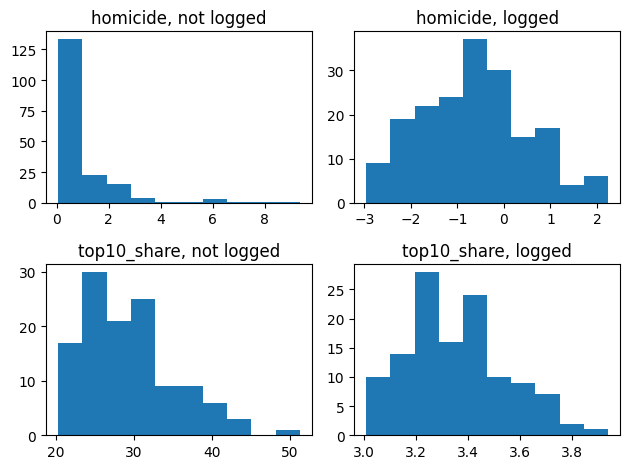

In [27]:
# Solution:
fig, ax = plt.subplots(2, 2)

plottype = [
    (0, 0, "homicide", False),
    (0, 1, "homicide", True),
    (1, 0, "top10_share", False),
    (1, 1, "top10_share", True)
]

for plot in plottype:
    coord = plot[:2]
    var = plot[2]
    use_log = plot[3]
    data = np.log(homicide[var]) if use_log else homicide[var]
    ax[coord].hist(data)
    ax[coord].set_title(f"{var}, {'logged' if use_log else 'not logged'}")

fig.tight_layout()
fig.show()

In [ ]:
# for the homocide we can clearly see that there is a benefit for looking at the log of the data, since the unlogged plot does not seem to be very balanced

# the top10_share sees no big difference

Estimate a linear regression (using `statsmodels`) to see if there is a  correlation between the ``top_10_share`` and the ``homicide`` rate in a country.

In [29]:
# Solution:
import statsmodels.formula.api as smf

In [35]:
model = smf.ols("homicide ~ top10_share", data=homicide)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:               homicide   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     43.92
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.08e-09
Time:                        15:12:13   Log-Likelihood:                -207.16
No. Observations:                 120   AIC:                             418.3
Df Residuals:                     118   BIC:                             423.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.1650      0.641     -4.939      

In [ ]:
# the coefficient for top10_share is .14 so there is a slight positive impact on the homicide. From the P>|t| we can see that
# this data is significant

Does the relationship still hold when you control for gni per capita?

In [36]:
# Solution:
model = smf.ols("homicide ~ gni_per_capita", data=homicide)
print(model.fit().summary())

# the coefficient is nearly zero and the R-Squared shows almost no correlation

                            OLS Regression Results                            
Dep. Variable:               homicide   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     9.726
Date:                Mon, 31 Mar 2025   Prob (F-statistic):            0.00213
Time:                        15:14:07   Log-Likelihood:                -306.95
No. Observations:                 174   AIC:                             617.9
Df Residuals:                     172   BIC:                             624.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2456      0.132      9.

Now create a a scatter plot to visualize the relationship.

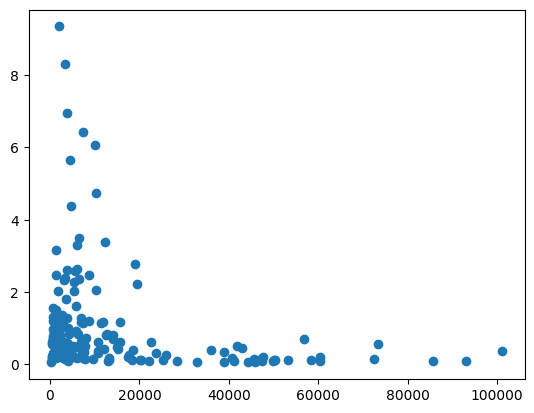

In [39]:
# Solution:
plt.scatter(homicide["gni_per_capita"], homicide["homicide"])

Customize your plot doing the following:
* Choose a different overall style for your plot (e.g. ``ggplot``)
* Change color, size and edgecolor of the dots
* Make the dots slightly transparent (``alpha`` parameter)
* Add axis labels and a title
* Use a log scale for the homicide rates

Then, export your graph to Drive or to your computer.

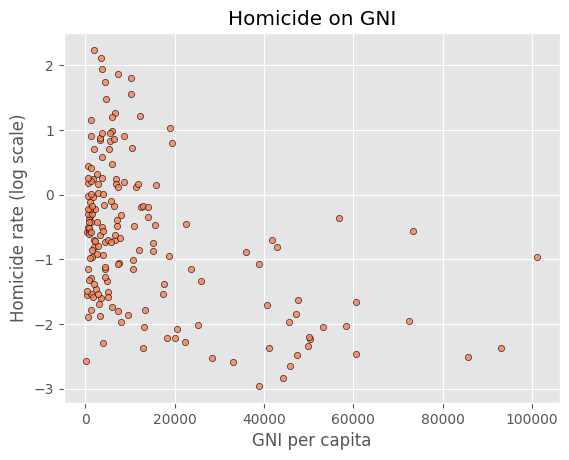

In [43]:
# Solution:
plt.style.use("ggplot")
plt.scatter(homicide["gni_per_capita"], np.log(homicide["homicide"]),
            color="coral",
            s=20,
            edgecolors="black",
            alpha=.8)
plt.xlabel("GNI per capita")
plt.ylabel("Homicide rate (log scale)")
plt.title("Homicide on GNI")
plt.savefig("homicide_on_gni.svg")

In [44]:
# Solution:


## Exercise 4

Convert the plot from exercise 3 into a *bubble plot* doing the following:

* Display the homicide share on a logarithmic scale

* Make the size of the dots/bubbles proportional to the population size

* Color the dots according to their logged ``gni_per_capita`` and add a colorbar. <font color='violet'> Hint: <font color='white'> You can provide the (logged) gni data directly as an argument to the ``c`` parameter. You can then use the ``cmap`` parameter to define what colors should be used. ``plt.colorbar()`` will make the colorbar appear beside the plot.


What can you say about the relationship between income level, inequality and homicides?




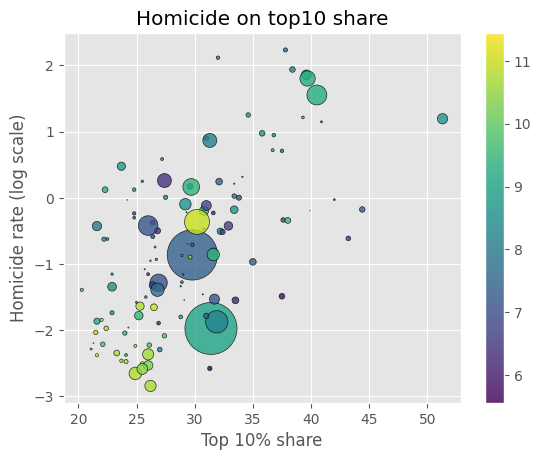

In [57]:
# Solution:
plt.style.use("ggplot")
plt.scatter(homicide["top10_share"], np.log(homicide["homicide"]),
            s=homicide["population"] / 10**6,
            edgecolors="black",
            alpha=.8,
            c=np.log(homicide["gni_per_capita"]))
plt.xlabel("Top 10% share")
plt.ylabel("Homicide rate (log scale)")
plt.title("Homicide on top10 share")
plt.colorbar()

In [ ]:
# Interpretation:
# the share of top 10 % has a positive effect on the homicide rate, while we do not see much of an effect of the GNI on homicide.